In [33]:
!pip install keras

In [34]:
!pip install tensorflow

In [35]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
dataframes = []
stock_name = []
for dirname, _, filenames in os.walk(r'C:\Users\Advait Shinde\Downloads\archive\Data'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        dataframes.append(pd.read_csv(os.path.join(dirname, filename),index_col = 0) )
        stock_name.append(filename)
        # print(dirname)
        # print(filename)

Data Structure: <br>
Index:

The index is a series of dates, which represents the trading days. It ranges from August 28, 2001 to June 5, 2020 in the snippet provided, and each entry corresponds to a specific trading day. <br><br>
Columns: There are six columns in the dataset, all of which contain numerical values:
<br><br>
Open: The opening price of the stock on a given day (e.g., $7.19 on January 3, 2000).<br>
High: The highest price reached by the stock during the trading day (e.g., $7.27 on January 3, 2000).<br>
Low: The lowest price reached by the stock during the trading day (e.g., $6.90 on January 3, 2000).<br>
Close: The closing price of the stock on the trading day (e.g., $7.20 on January 3, 2000).<br>
Adj Close: The adjusted closing price, which accounts for corporate actions like stock splits and dividends. This is typically used for more accurate analysis of price trends over time.<br>
Volume: The number of shares traded on that day (e.g., 1,080,680 on January 3, 2000).<br>

In [36]:
dataframes[10].head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,7.19,7.27,6.90,7.20,7.20,1080680
2000-01-04,7.29,7.29,6.98,7.15,7.15,500225
2000-01-05,7.01,7.10,6.80,6.96,6.96,701765
2000-01-06,7.09,7.10,6.85,7.00,7.00,922025
2000-01-07,6.96,6.97,6.77,6.80,6.80,1273355


In [37]:
dataframes[100].shape

(3993, 6)

In [38]:
dataframes[100].describe()

,Open,High,Low,Close,Adj Close,Volume
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,22.651483,23.073218,22.160616,22.594510,19.871637,1932.075883
std,8.657206,8.743295,8.462118,8.576955,9.165706,10511.153682
min,4.150000,4.150000,4.150000,4.150000,2.563432,0.000000
25%,14.800000,15.010000,14.350000,14.750000,10.592052,1.000000
50%,25.000000,25.500000,24.650000,25.150000,22.704216,200.000000
75%,28.850000,29.250000,28.000000,28.750000,27.143499,1041.000000
max,51.250000,51.250000,50.000000,50.000000,45.500000,367010.000000


In [39]:
dataframes[100].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 2001-08-28 to 2020-06-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3993 non-null   float64
 1   High       3993 non-null   float64
 2   Low        3993 non-null   float64
 3   Close      3993 non-null   float64
 4   Adj Close  3993 non-null   float64
 5   Volume     3993 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 218.4+ KB


Text(0.5, 1.0, 'Closing Price of ADMANUM.BO.csv')

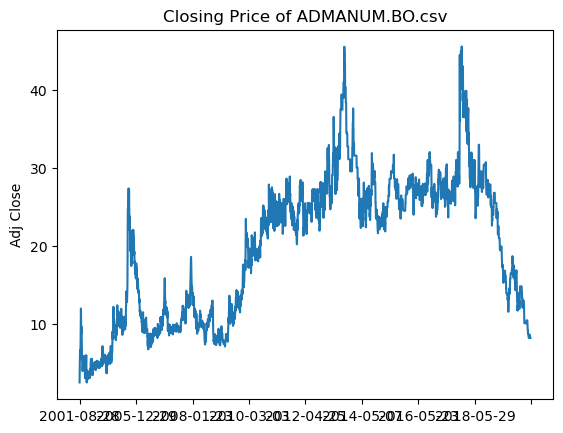

In [40]:
dataframes[100]['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {stock_name[100]}")

Text(0.5, 1.0, 'Volume of ADMANUM.BO.csv')

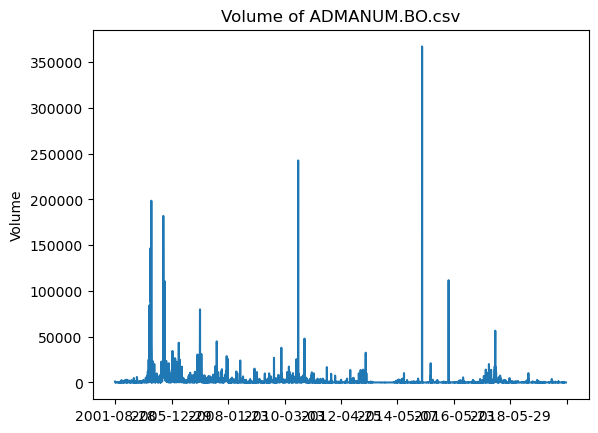

In [41]:
dataframes[100]['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Volume of {stock_name[100]}")

These values represent moving average (MA) periods in terms of trading days. The moving average is commonly used in financial analysis to smooth out price data and identify trends over different time frames. <br><br>
10-day MA: A short-term trend indicator (often used for immediate trading decisions).<br>
50-day MA: A medium-term trend.<br>
100-day and 365-day MAs: Longer-term trends, with 365 days typically representing a full year's worth of trading data.<br>

In [42]:
ma_day = [10,50,100,365]
for ma in ma_day:
    for company in dataframes:
        column_name = f"MA for {ma} days"
        #rolling calculates mean over ma days in time series
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'MA for 10 days of ADMANUM.BO.csv')

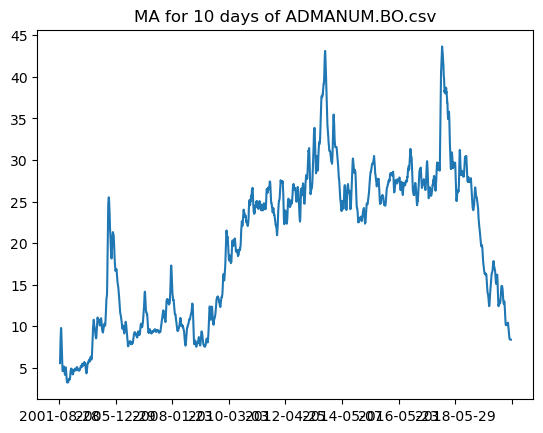

In [43]:
dataframes[100]['MA for 10 days'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title(f"MA for 10 days of {stock_name[100]}")

Text(0.5, 1.0, 'MA for 10 days of ADMANUM.BO.csv')

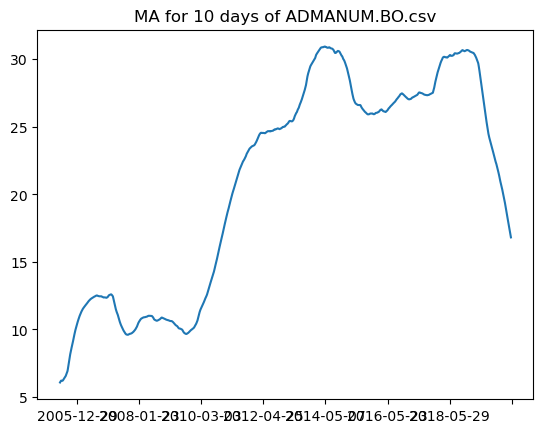

In [44]:
dataframes[100]['MA for 365 days'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title(f"MA for 10 days of {stock_name[100]}")

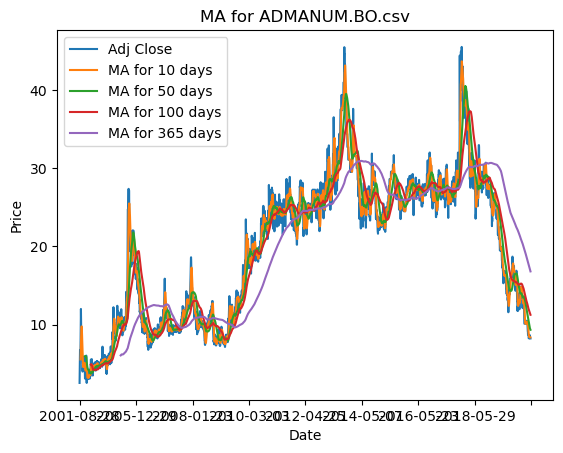

In [45]:
dataframes[100][['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'MA for 365 days']].plot()

plt.ylabel('Price')
plt.xlabel('Date')
plt.title(f"MA for {stock_name[100]}")

plt.show()

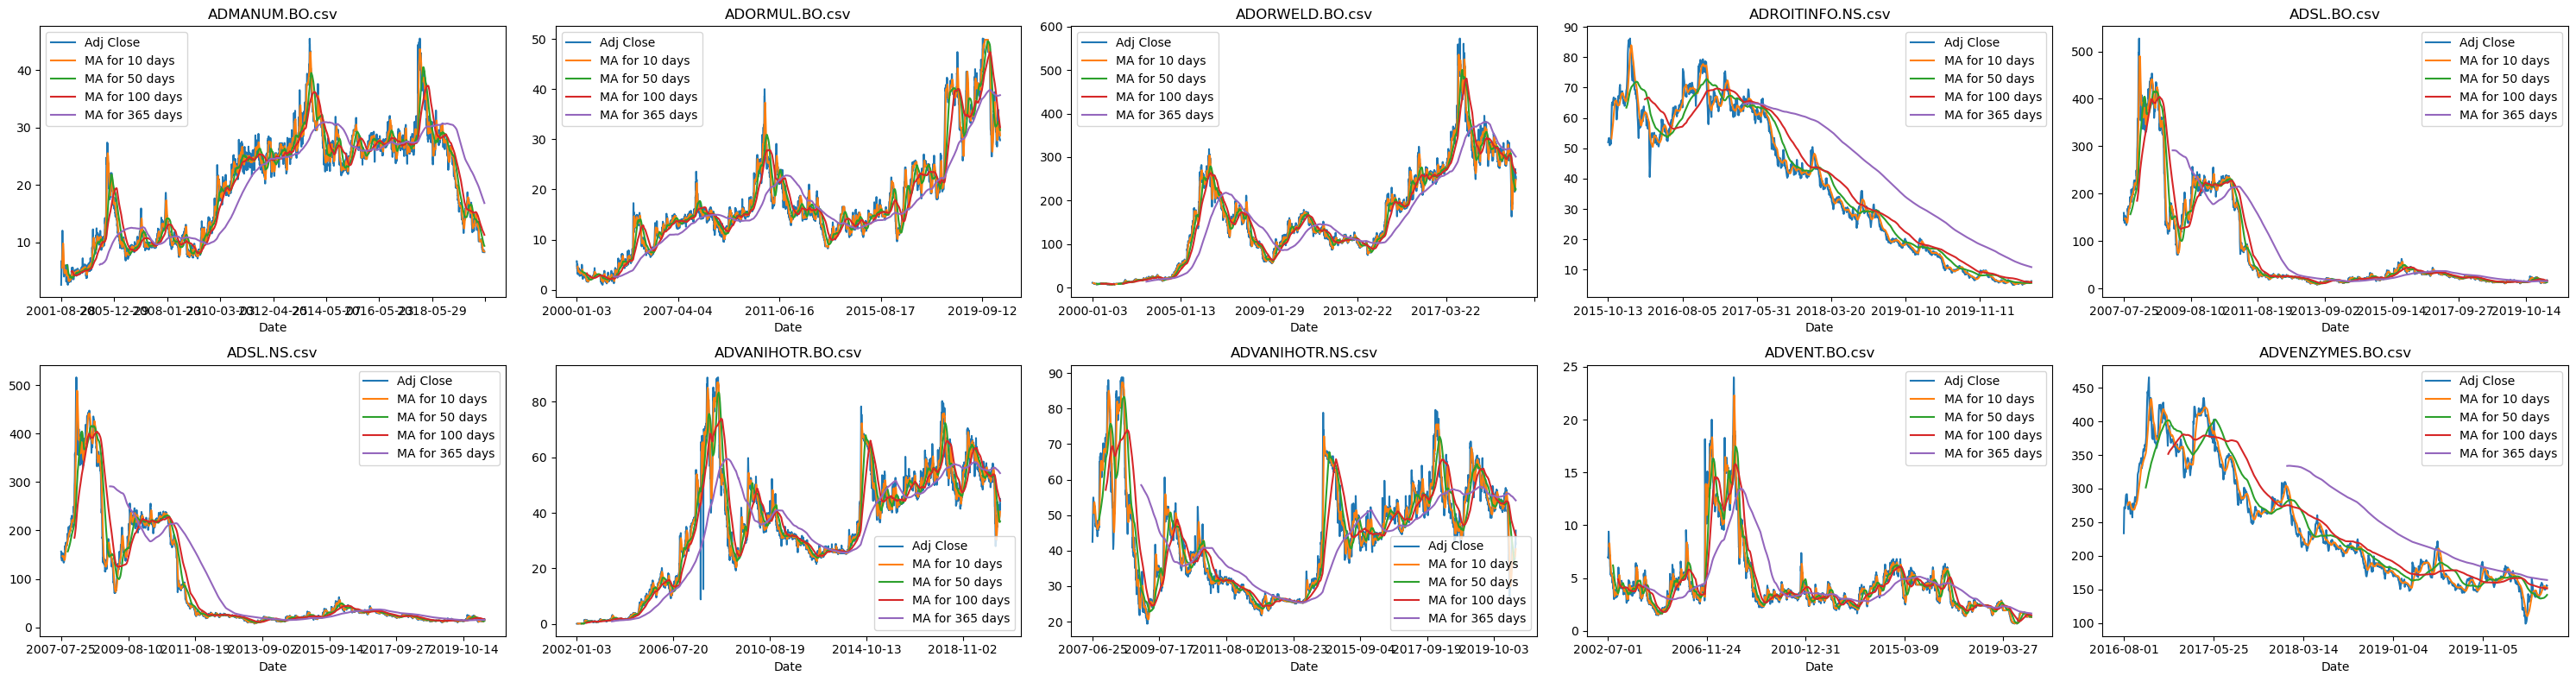

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=5)
fig.set_figheight(8)
fig.set_figwidth(30)
k = 0; j = 0;
for i in range(100,110):
    dataframes[i][['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days','MA for 365 days']].plot(ax=axes[k,j]).set_title(f"{stock_name[i]}");
    j = j+1;
    if(j==5):
        k=1;
        j=0;
fig.tight_layout()

In [47]:
for company in dataframes:
    company['Daily Return'] = company['Adj Close'].pct_change() #percentage change

C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\1485992877.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company['Daily Return'] = company['Adj Close'].pct_change() #percentage change
C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\1485992877.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company['Daily Return'] = company['Adj Close'].pct_change() #percentage change
C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\1485992877.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either

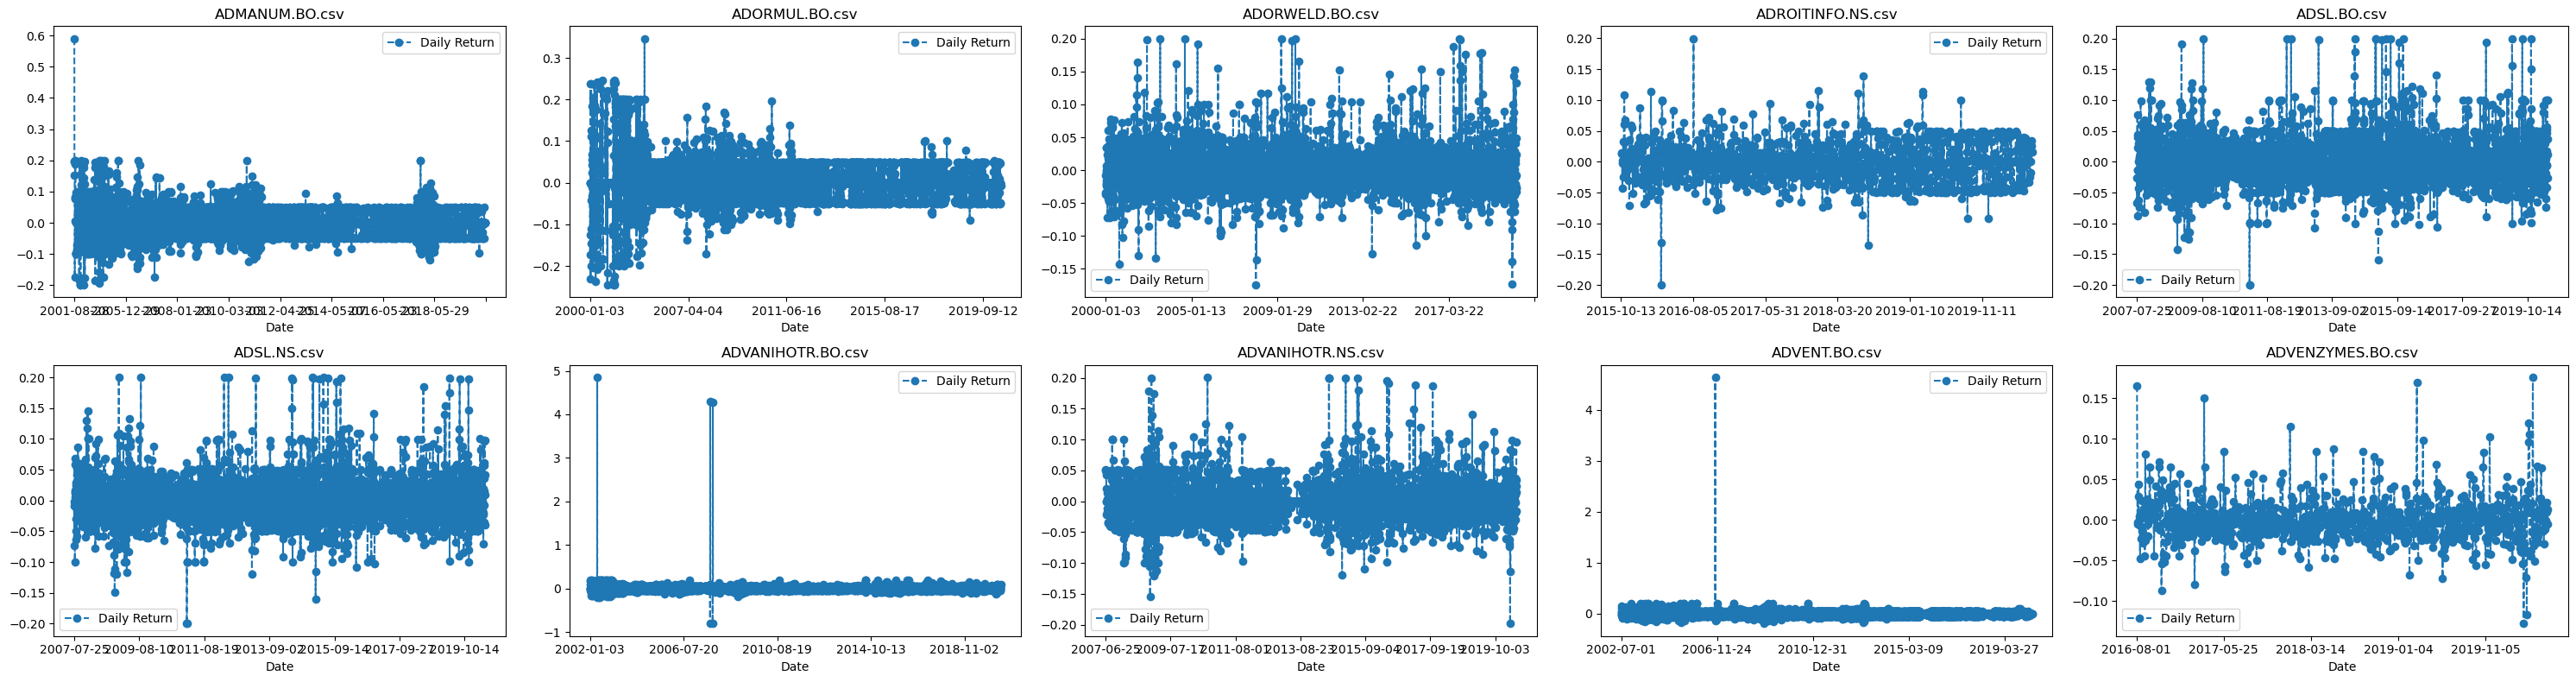

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=5)
fig.set_figheight(8)
fig.set_figwidth(30)
k = 0; j = 0;
for i in range(100,110):
    dataframes[i][['Daily Return']].plot(ax=axes[k,j], linestyle = '--', marker = 'o').set_title(f"{stock_name[i]}");
    j = j+1;
    if(j==5):
        k=1;
        j=0;
fig.tight_layout()

Building LSTM

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [50]:
def build_training_dataset(input_ds):
    # new df with close column
    input_ds.reset_index()
    data = input_ds.filter(items=['Close'])
    
    dataset = data.values

    # number of rows to train the model on
    
    training_data_len = int(np.ceil( len(dataset) * .95 ))
    return data, dataset, training_data_len

#Test the function
training_data_df, training_dataset_np, training_data_len = build_training_dataset(dataframes[100])
dataset=training_dataset_np
data=training_data_df

In [51]:
data

,Close
Date,
2001-08-28,4.15
2002-02-18,6.60
2002-02-21,7.90
2002-02-22,9.45
2002-02-25,10.90
...,...
2020-06-01,8.25
2020-06-02,8.25
2020-06-03,8.25


In [52]:
from sklearn.preprocessing import MinMaxScaler
def scale_the_data(dataset):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    return scaler, scaled_data

#Test the function
scaler, scaled_data = scale_the_data(training_dataset_np)

In [53]:
def split_train_dataset(training_data_len):
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        if i<= 61:
            #print(x_train)
            #print(y_train)
            print('.')
            
    # Convert to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    return x_train, y_train

#Test the function
x_train,y_train = split_train_dataset(training_data_len)

.
.


In [54]:
def build_lstm_model(x_train,y_train):

    # Build the LSTM model

    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # compile the model
    # adam ~ Stochastic Gradient descent method.
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model 

#Test the function
lstm_model = build_lstm_model(x_train,y_train)

c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3734/3734 ━━━━━━━━━━━━━━━━━━━━ 98s 25ms/step - loss: 0.0033


In [55]:
def create_testing_data_set(model, scaler, training_data_len,test_data_len):
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - test_data_len: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(test_data_len, len(test_data)):
        x_test.append(test_data[i-test_data_len:i, 0])
    
    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    rmse
    return (x_test, y_test, predictions, rmse)

#Test the function
TEST_DATA_LENGTH = 100
x_test,y_test, predictions, rmse = create_testing_data_set(lstm_model,scaler,training_data_len, TEST_DATA_LENGTH)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


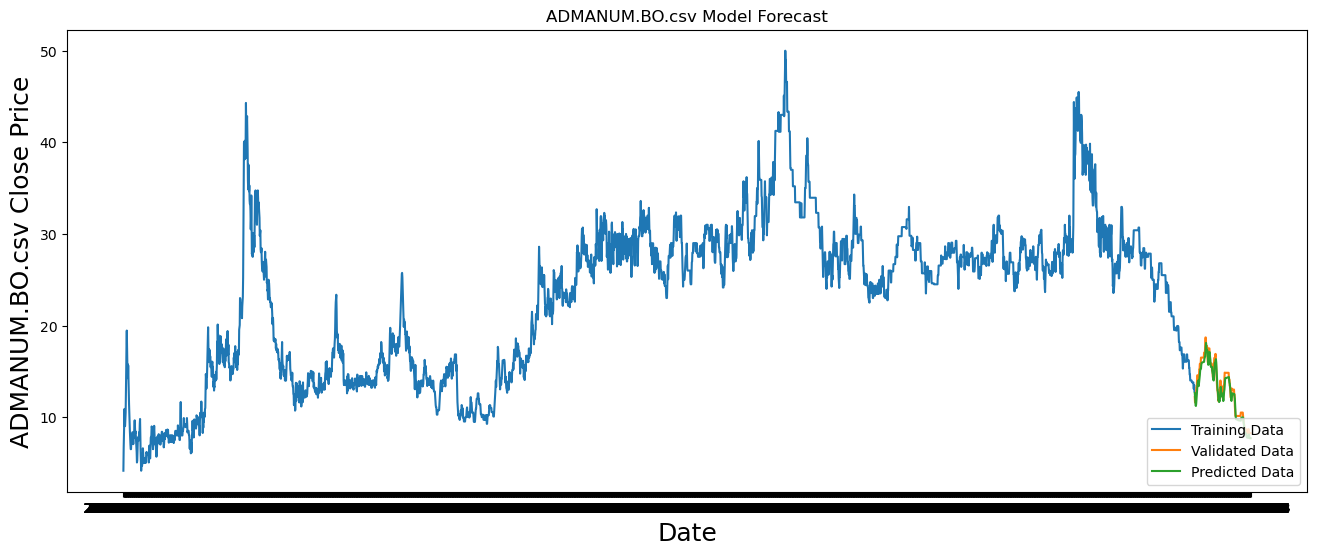

In [56]:
def plot_predictions(stock, data,training_data_len):
    #Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    # Visualize the data
    plt.figure(figsize=(16,6))
    title = stock + ' Model Forecast'
    ylabel = stock + ' Close Price'
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Training Data', 'Validated Data', 'Predicted Data'], loc='lower right')
    plt.show()
    return valid
    
#Test the function
valid = plot_predictions(stock_name[100],data,training_data_len)

.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2308/2308 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - loss: 0.0034
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


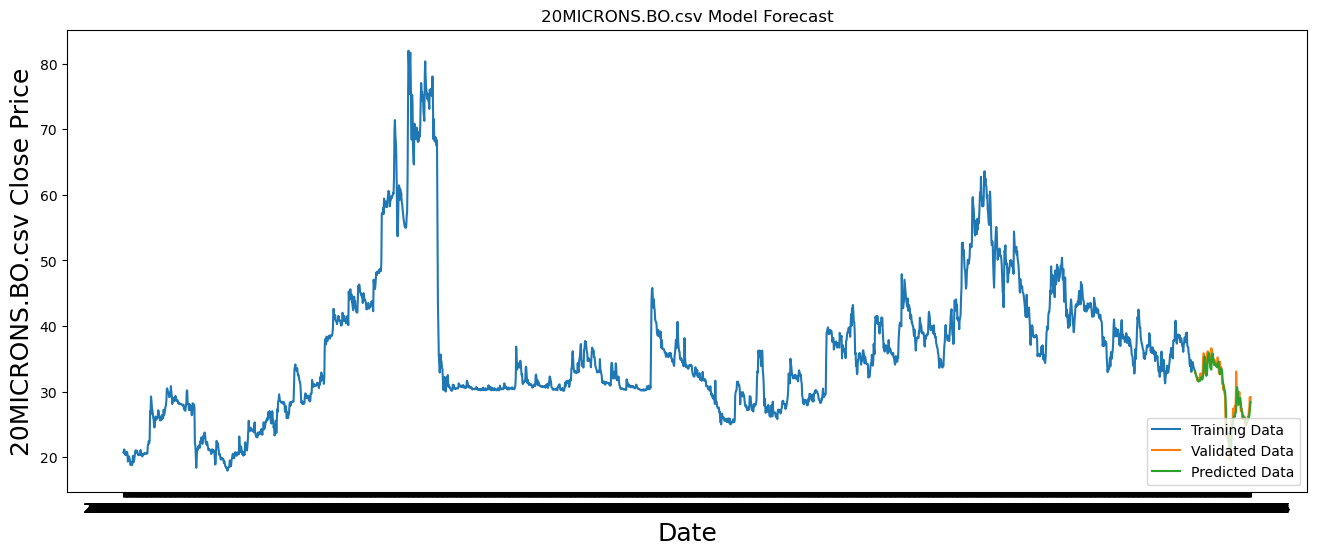

Test RMSE: 1.329
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2309/2309 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - loss: 0.0028
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


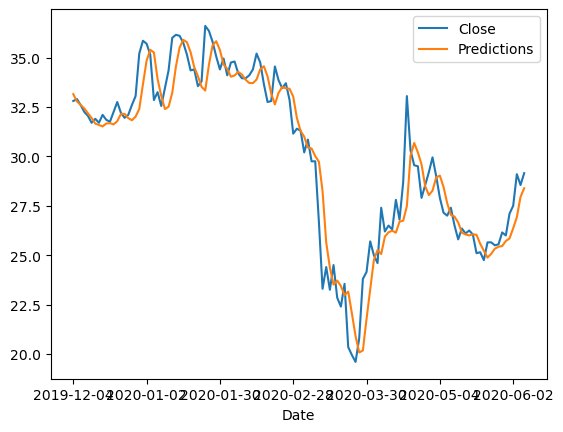

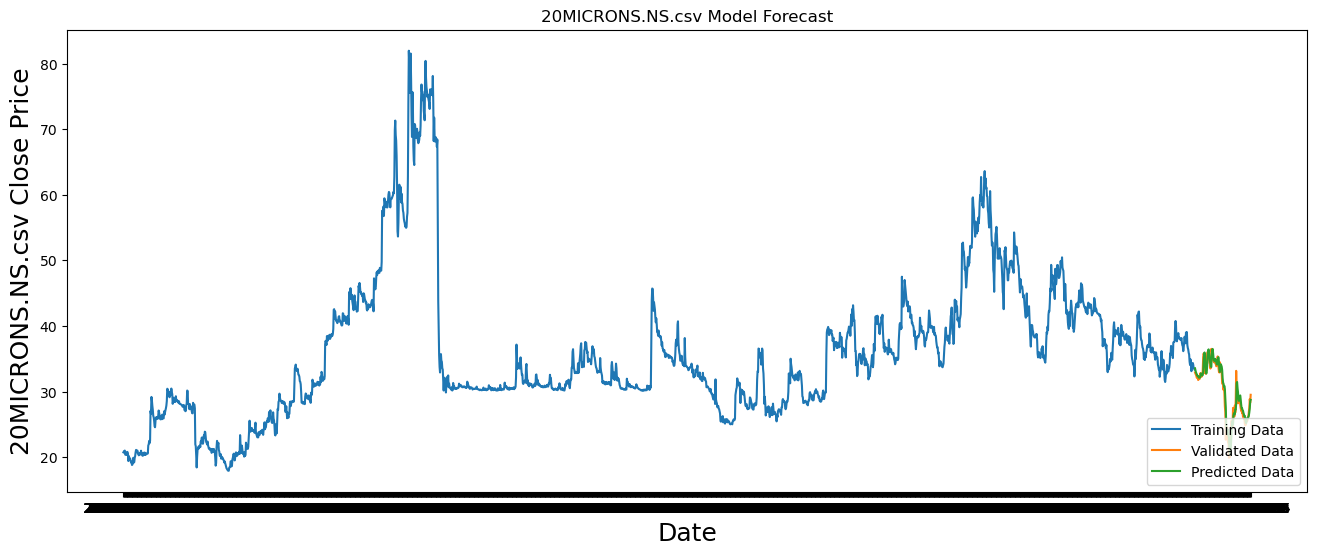

Test RMSE: 1.215
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3816/3816 ━━━━━━━━━━━━━━━━━━━━ 452s 116ms/step - loss: 0.0011
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


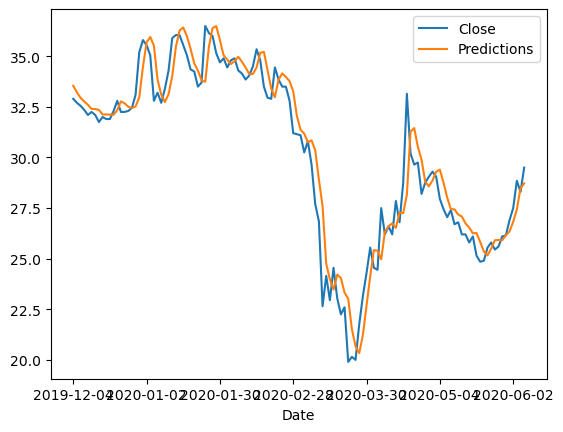

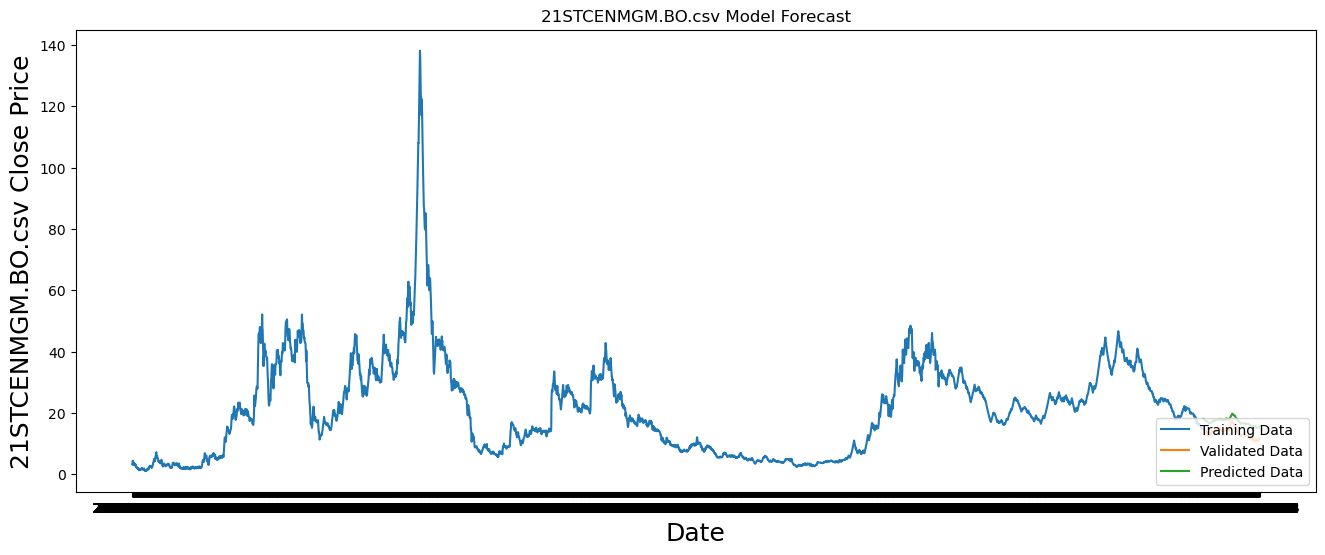

Test RMSE: 3.660
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


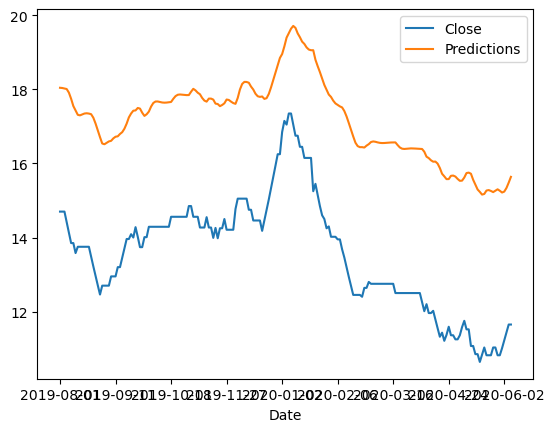

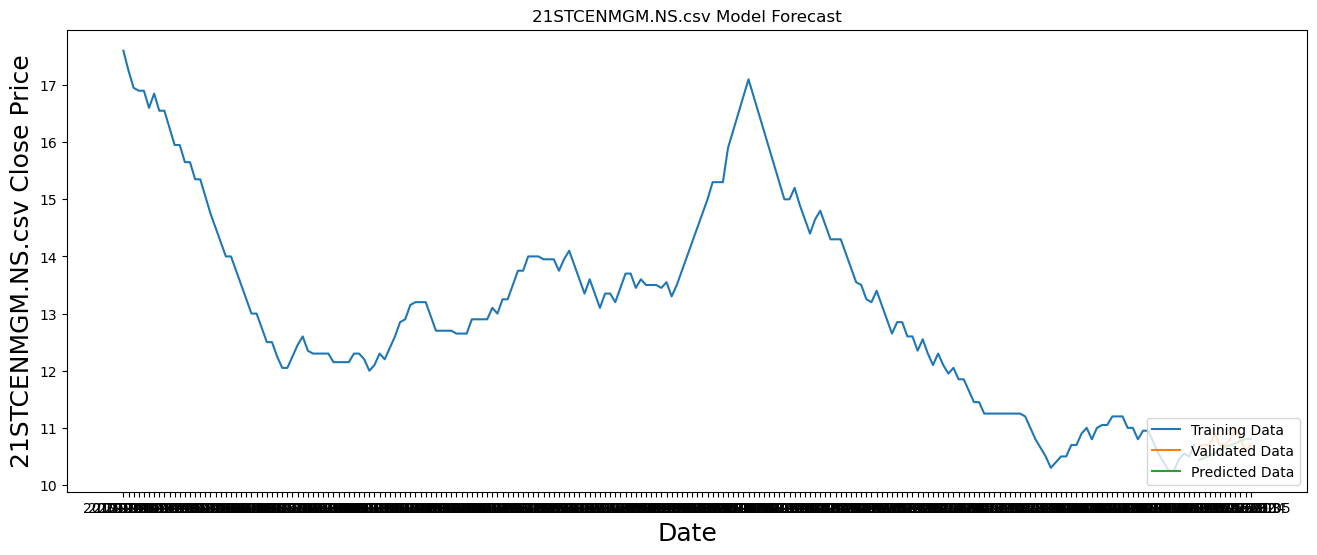

Test RMSE: 0.194
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1453/1453 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - loss: 0.0042
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


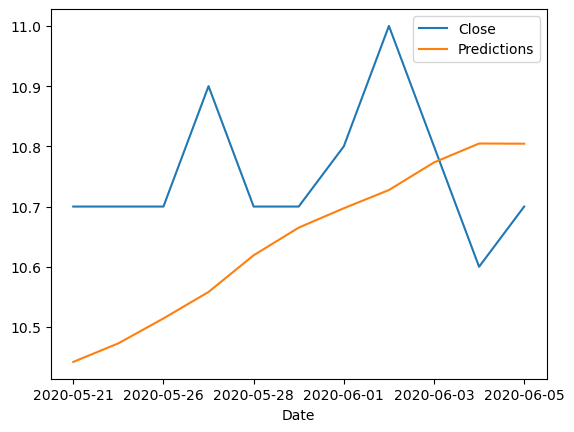

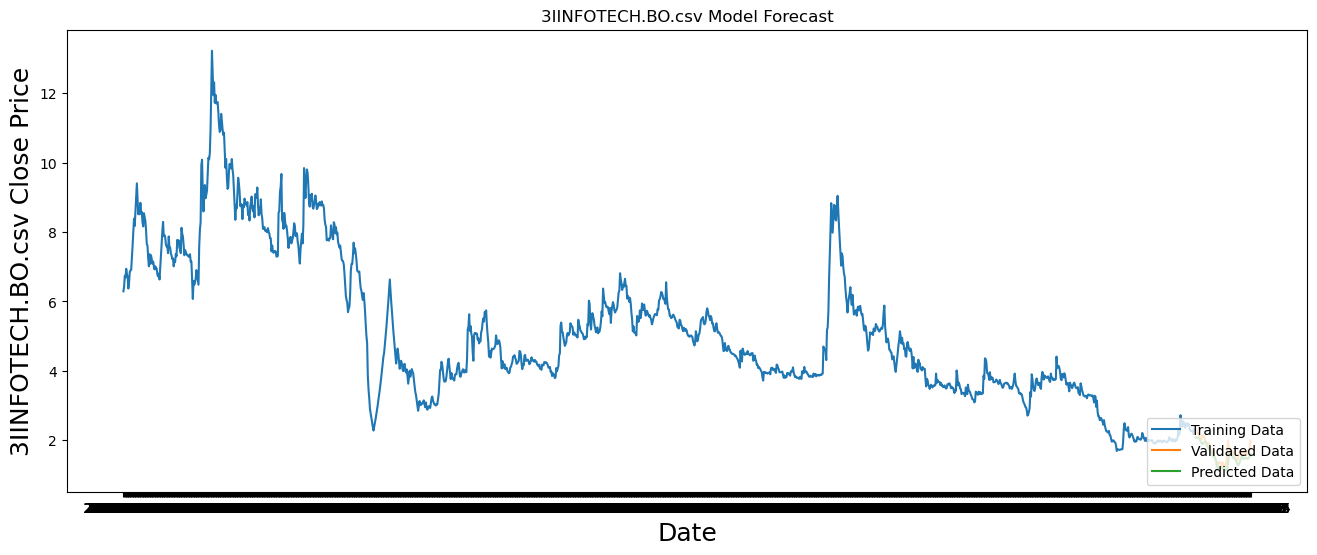

Test RMSE: 0.181
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3126/3126 ━━━━━━━━━━━━━━━━━━━━ 97s 30ms/step - loss: 0.0030
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


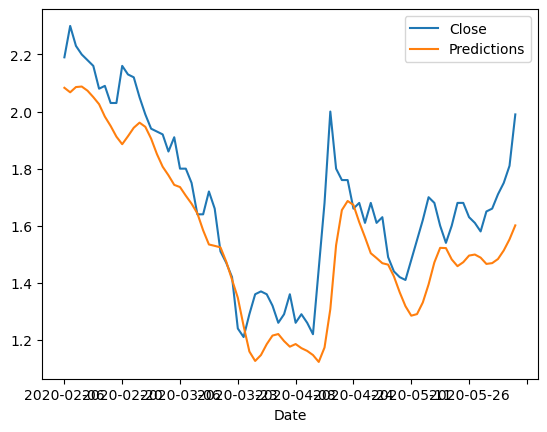

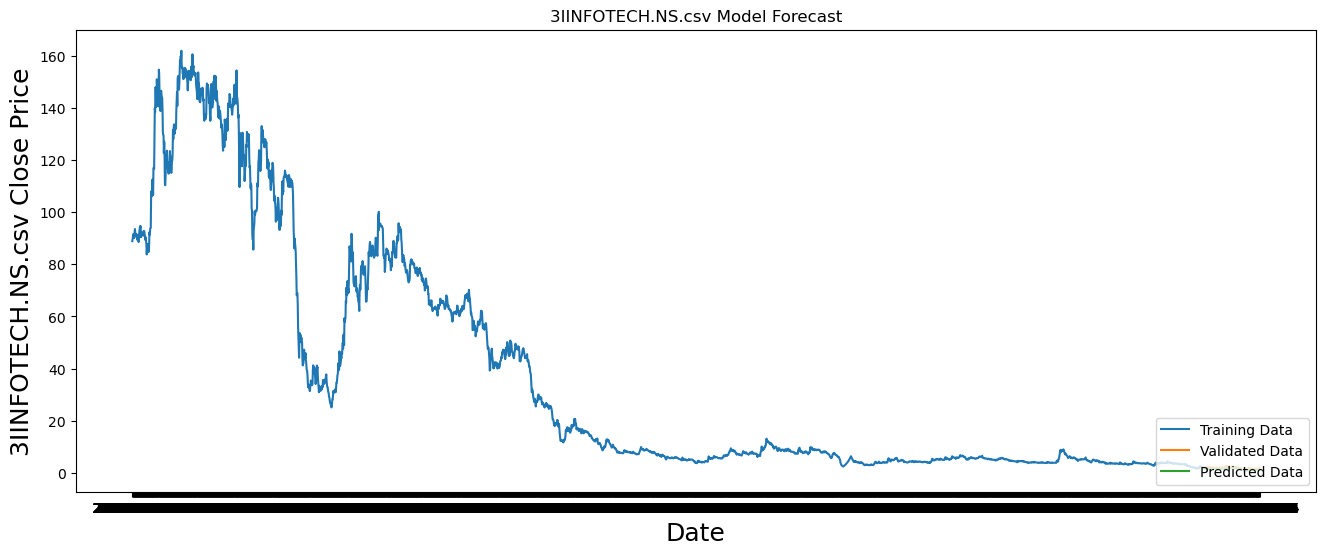

Test RMSE: 0.465
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4138/4138 ━━━━━━━━━━━━━━━━━━━━ 101s 23ms/step - loss: 0.0017
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


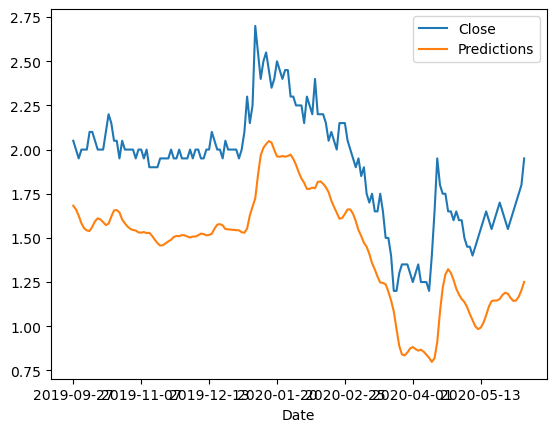

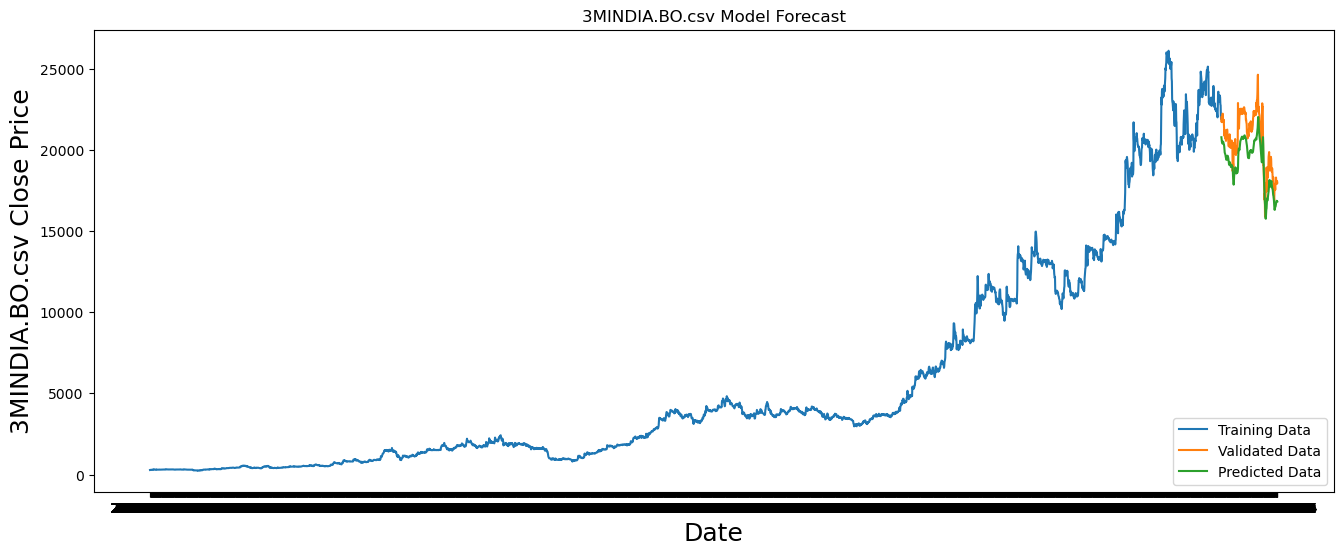

Test RMSE: 1508.221
.
.


c:\Users\Advait Shinde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3790/3790 ━━━━━━━━━━━━━━━━━━━━ 105s 26ms/step - loss: 0.0035
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_34716\2307972157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


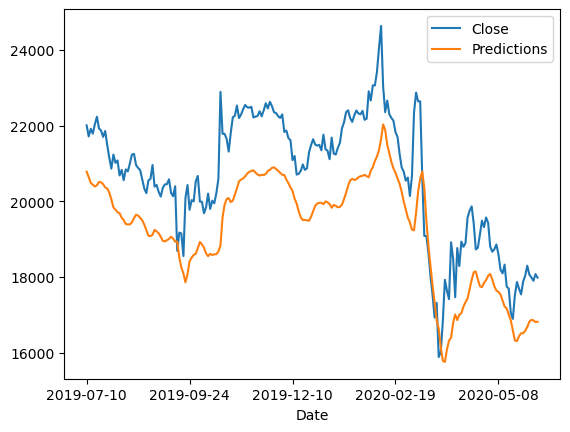

KeyboardInterrupt: 

In [57]:
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

i = 0
TEST_DATA_LENGTH = 111
error_scores = {}
trained_model = {}

for stock in stock_name:
    df = dataframes[i]
    
    dataframes[i].dropna(inplace=True)
    i += 1

    # building and scale the training dataset
    training_data_df, training_dataset_np, training_data_len = build_training_dataset(df)
    dataset = training_dataset_np
    data = training_data_df
    scaler, scaled_data = scale_the_data(training_dataset_np)
    x_train, y_train = split_train_dataset(training_data_len)

    # Build the LSTM model 
    lstm_model = build_lstm_model(x_train, y_train)  # Adjust build_lstm_model to use Input layer
    trained_model[stock] = lstm_model

    # Create testing dataset and generate predictions
    x_test, y_test, predictions, rmse = create_testing_data_set(lstm_model, scaler, training_data_len, TEST_DATA_LENGTH)
    
    # Plot the predictions and place the legend in the top-right corner
    valid = plot_predictions(stock, data, training_data_len)
    valid.plot()  # Assuming your plot function returns a plot
    
    # Move the legend to the top-right corner
    plt.legend(loc='upper right')  # Adjust the legend placement

    # Show the valid and predicted prices
    rmse = sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
    print('Test RMSE: %.3f' % (rmse))

    # Store the RMSE for each stock
    error_scores[stock] = rmse

# Output the error scores
print(error_scores)
